### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading dataset
bike_sharing = pd.read_csv('day.csv')
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#check shape
bike_sharing.shape

(730, 16)

In [4]:
#check null attributes and datatype
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


We don't see any mising values here

In [5]:
#check the statistical distribution
bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
#Let us see if we can drop any variable just by looking at the head
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
# As we can see that the instant variable is just the row number, and will have no relevance with the target variable, so let us drop that
bike_sharing.drop(['instant'], axis = 1, inplace = True)

In [8]:
# Let us see if any variable is having a linear relationship with the target variable i.e cnt

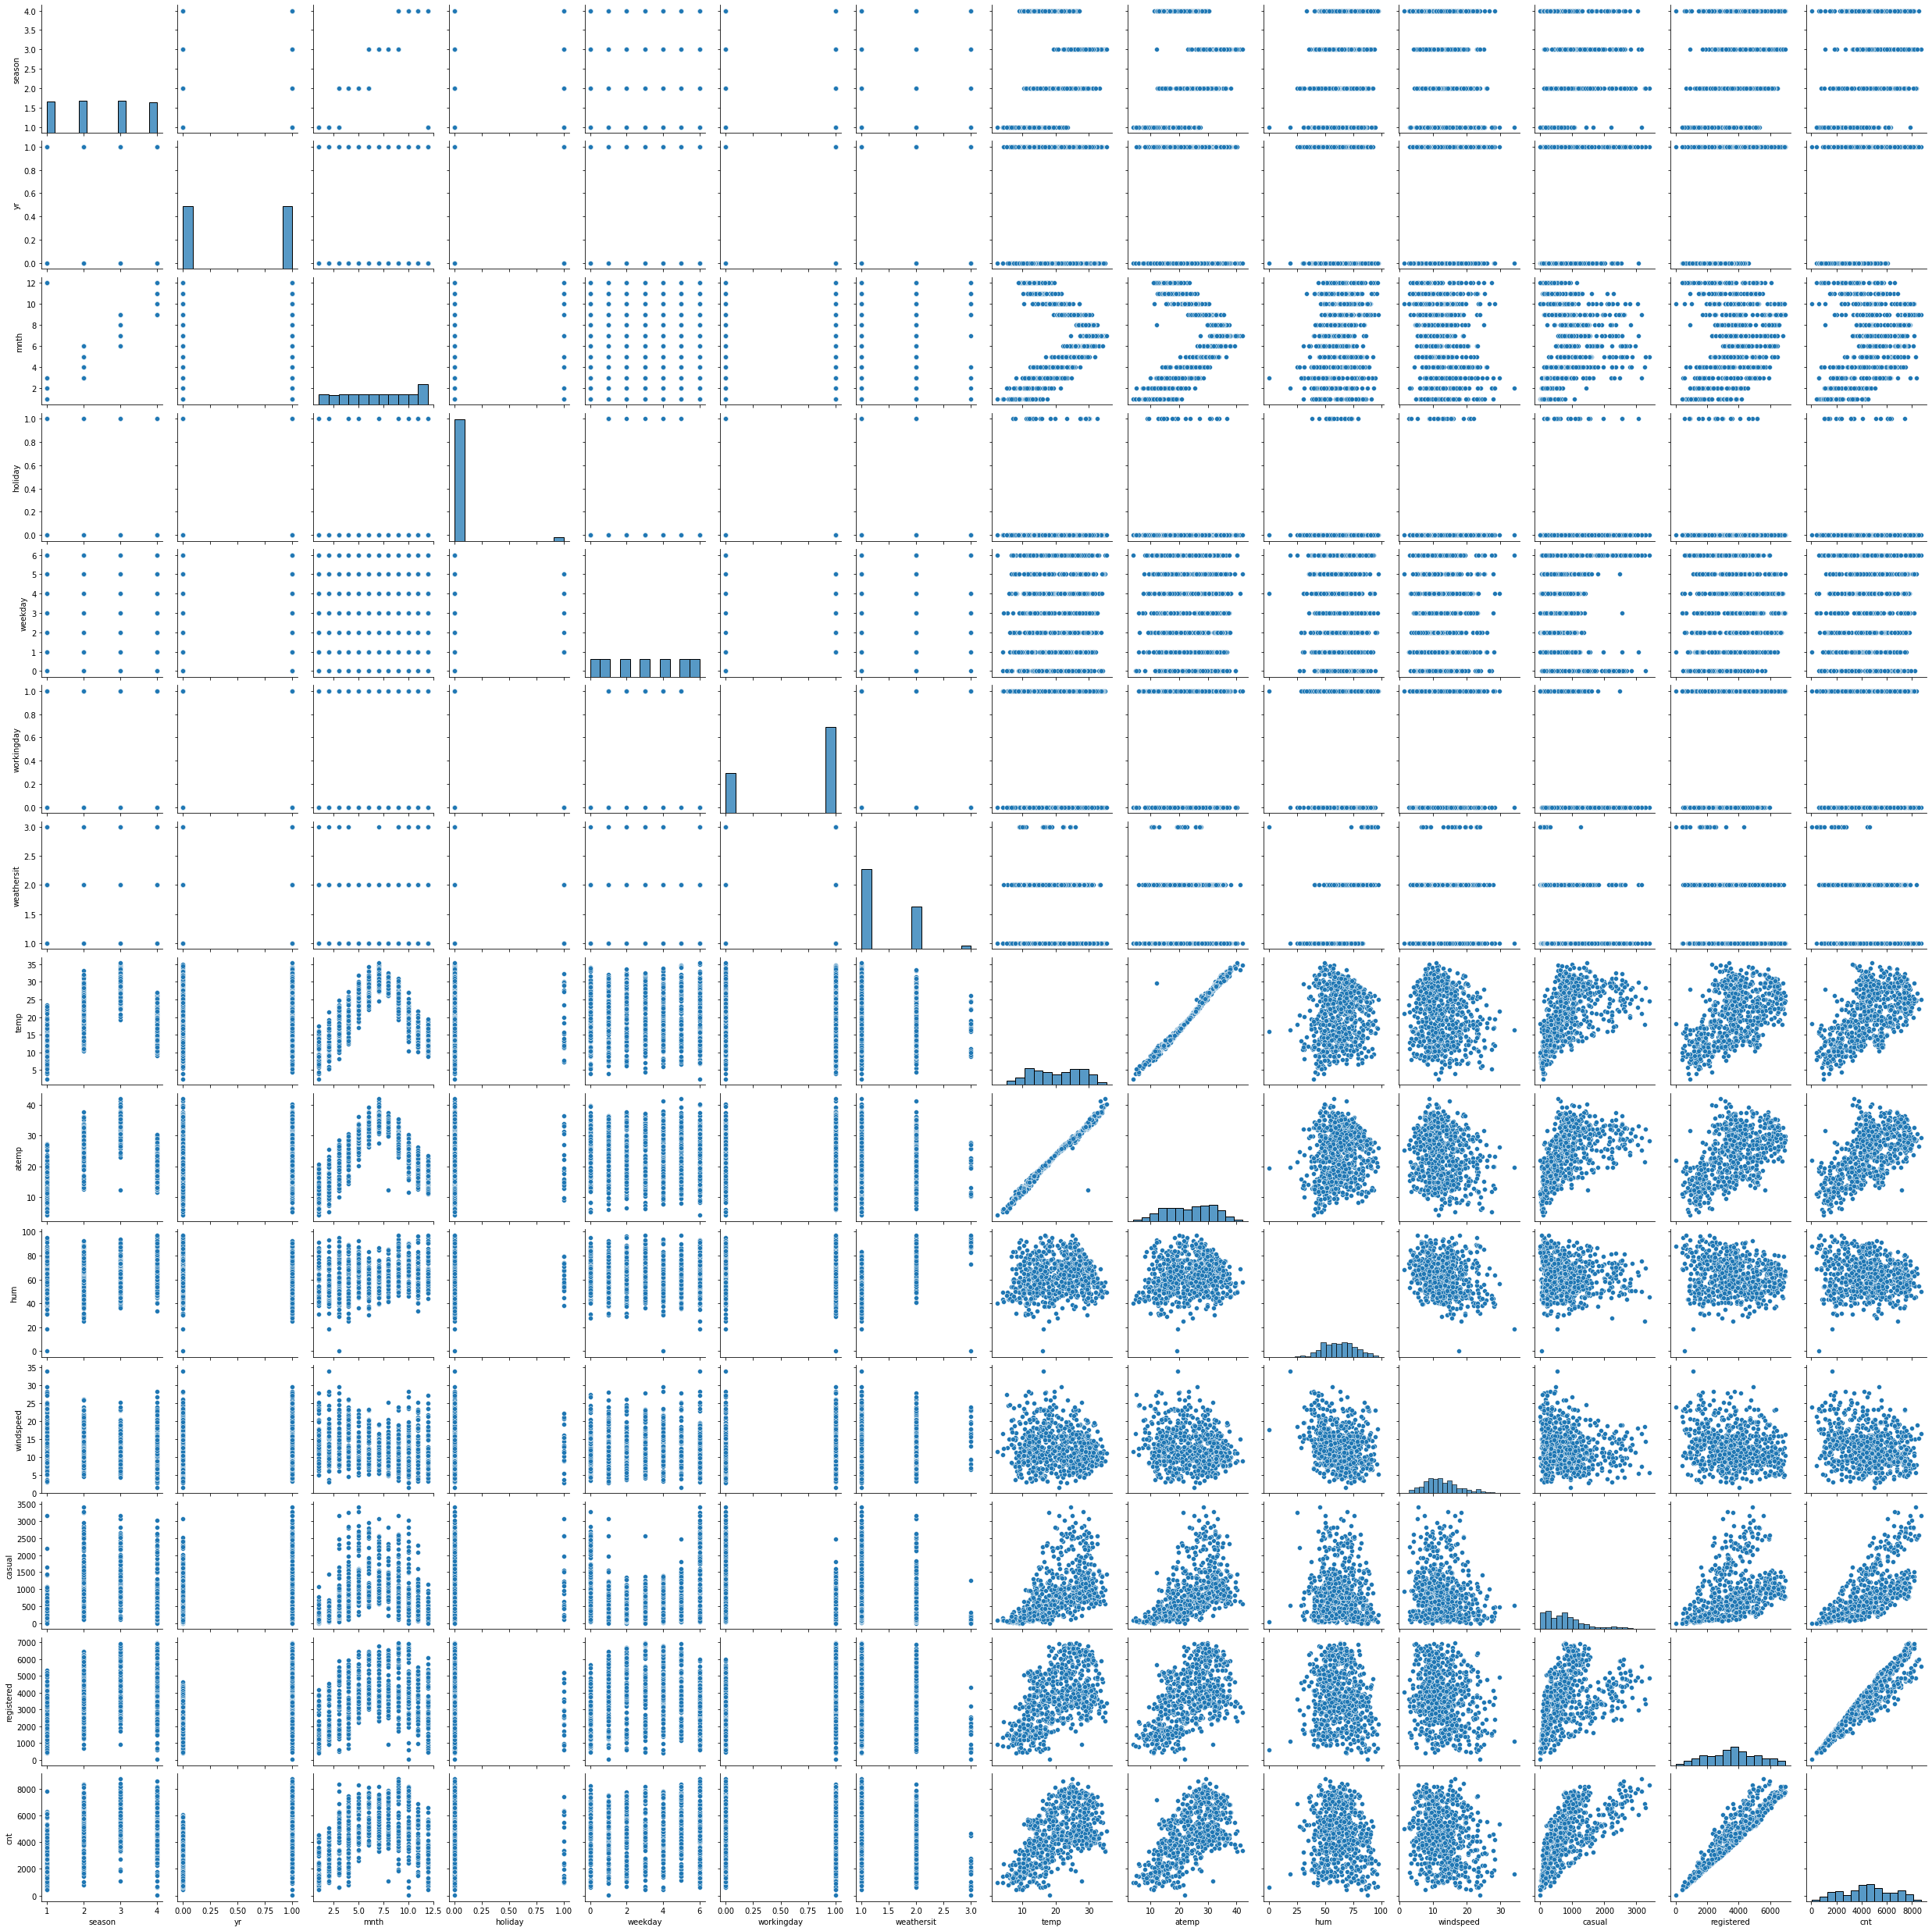

In [9]:
#Visualising numeric variables
sns.pairplot(bike_sharing)
plt.show()

In [10]:
# We can see that things like temp, atemp, casual,registered do show a linear relationship with cnt
# Thus making a linear regression model makes sense here

In [11]:
#Let us also see if there are any categorical variables in the dataset.

In [12]:
bike_sharing.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


We don't see any explicit categorical variables as such, but variables like season, yr, month, holiday, weekday, workingday, weathersit, should all be converted to categorical variables.

In [13]:
bike_sharing.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)
bike_sharing.yr.replace({0:'2018',1:'2019'},inplace = True)
bike_sharing.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)
bike_sharing.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'},inplace = True)
bike_sharing.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'},inplace = True)
bike_sharing.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,spring,2018,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,spring,2018,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,spring,2018,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,spring,2018,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,spring,2018,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [14]:
#We can wee we have date information captured in year, month, weekday, columns so we can drop the dteday column
bike_sharing.drop(['dteday'],inplace=True,axis=1)

In [15]:
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,2018,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,2018,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,2018,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,2018,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,2018,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [16]:
#Check if any other columns can be dropped

In [17]:
#As observed we can see that casual and registered users are information which can not be obtained at the time of data gathering, it can only be inferred after we have full information of that day. Thus we will never have this data in real life at the beggining of the day, so we can just drop these two columns as well
bike_sharing.drop(['casual','registered'],inplace=True,axis=1)
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


In [18]:
#check if there are any null values
bike_sharing.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [19]:
bike_sharing.shape

(730, 12)

In [20]:
bike_sharing.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [21]:
# we have 12 columns, let us divide them into categorical or numerical variables
numerical_vars = ['temp','atemp','hum','windspeed']
categorical_vars = ['season','yr','mnth','holiday','weekday','workingday',
'weathersit']

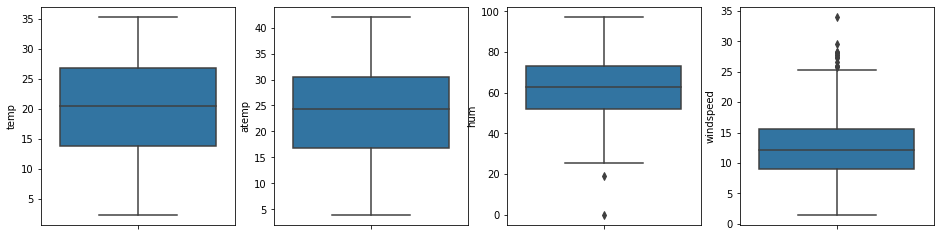

In [22]:
# we can do a univariate analysis on the numerical variables
plt.figure(figsize=(16,4))

i = 1
for col in numerical_vars:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bike_sharing)
    i+=1

In [23]:
#there are no outliers evident from these plots

In [24]:
#let us draw the pair plots again with reduced dimensions

In [25]:
print(numerical_vars+['cnt'])

['temp', 'atemp', 'hum', 'windspeed', 'cnt']


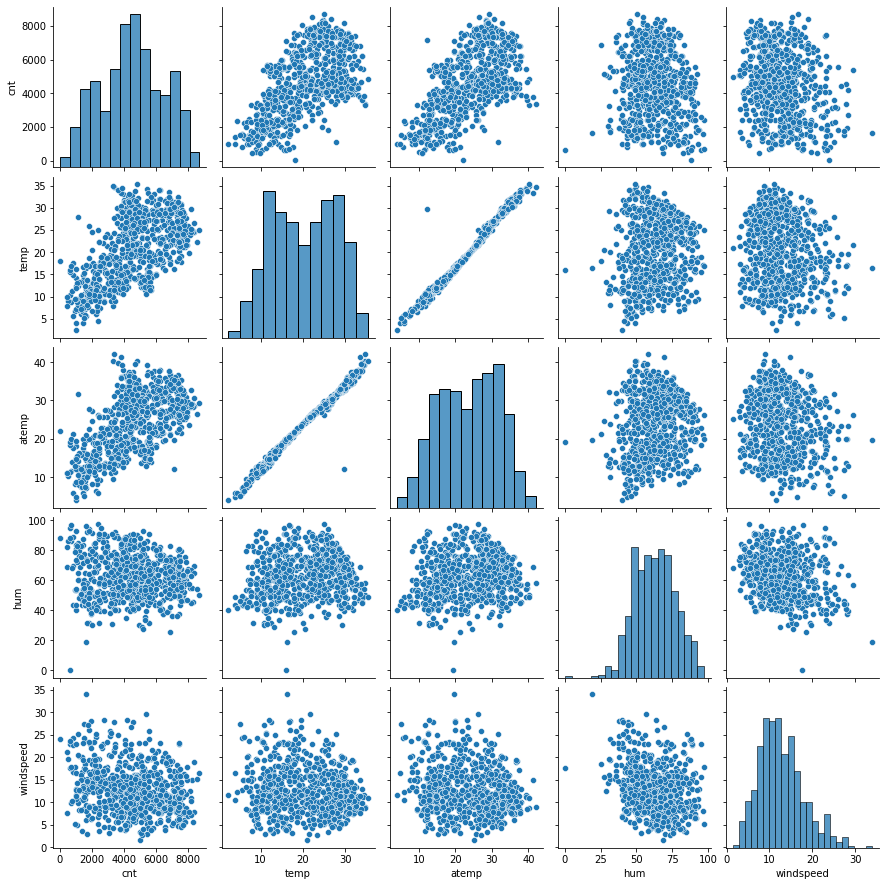

In [26]:
#for numerical categories
vars = ['cnt'] + numerical_vars
sns.pairplot(data=bike_sharing,vars=vars)

In [27]:
#Just by looking at this it seems temp and atemp are highly correlated, we might have to deal with multicolinearilty in this model
# We see good linear relationship between cnt and other variables

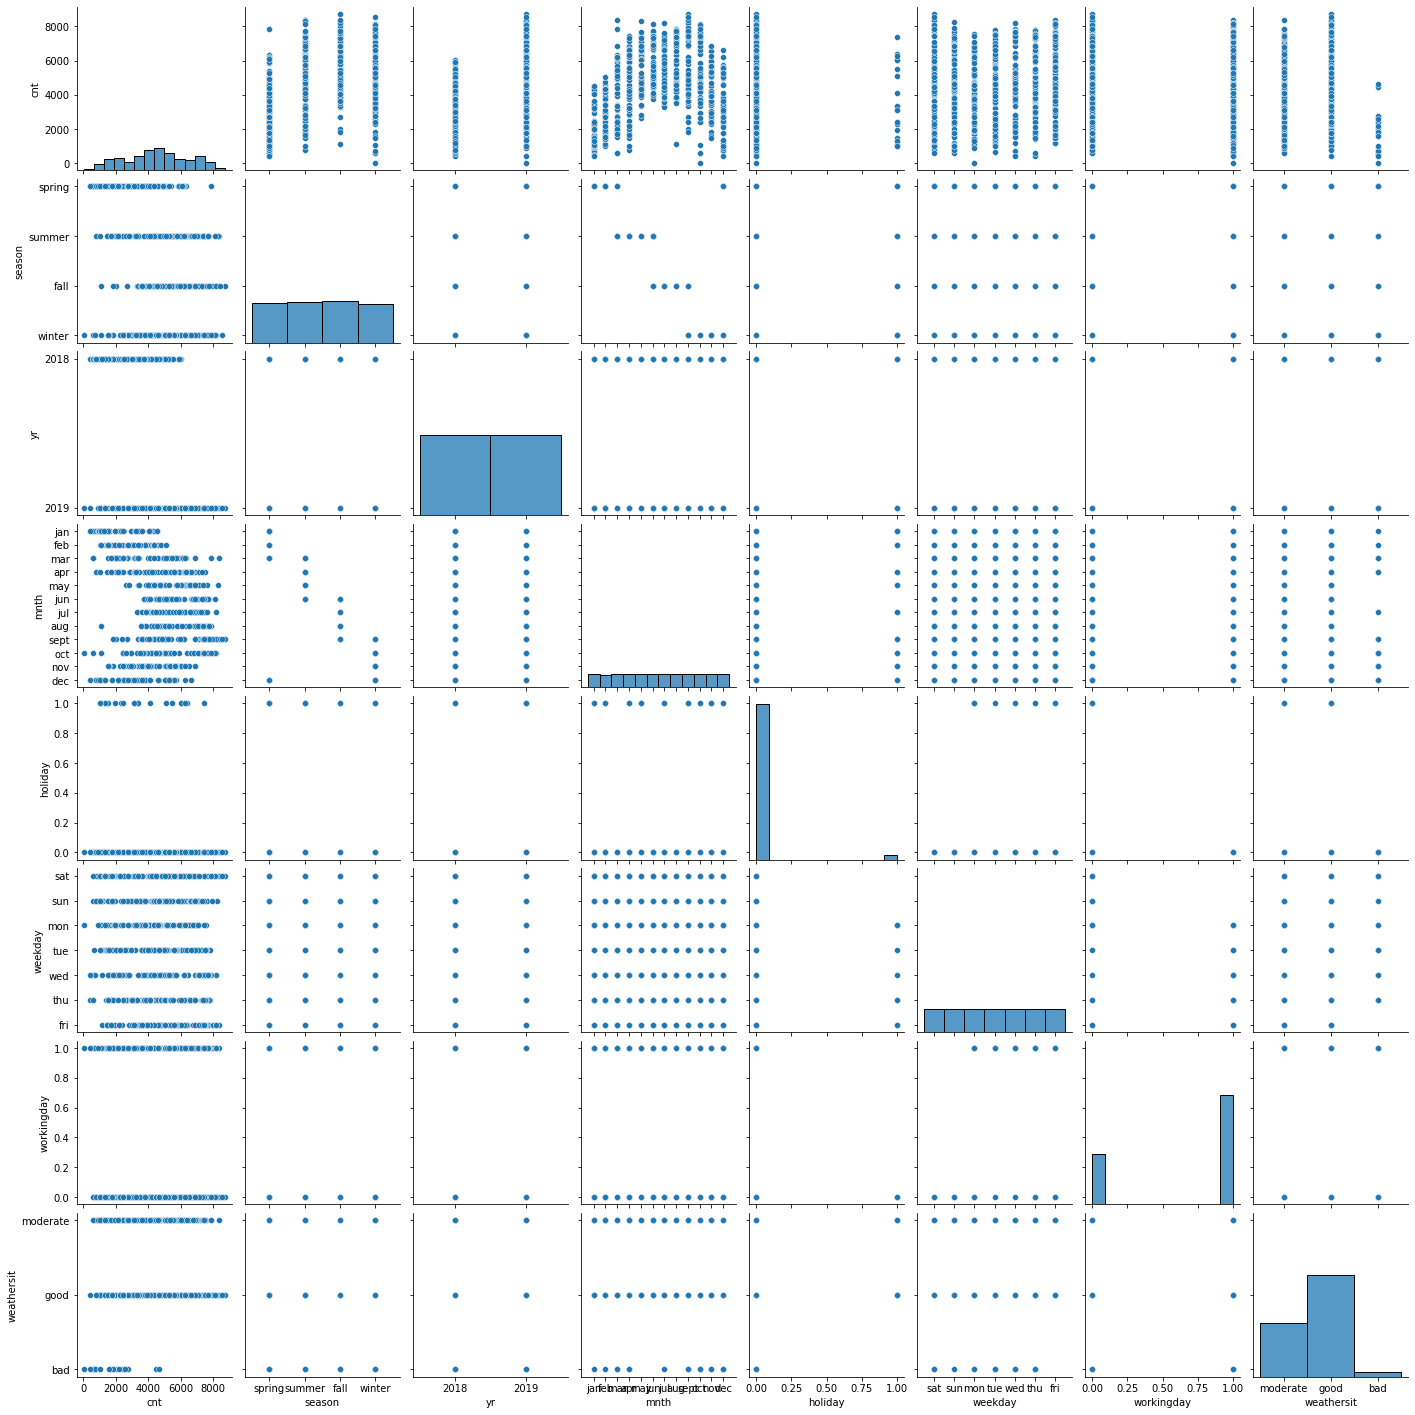

In [28]:
# Let us include the categorical_vars as well
vars = ['cnt'] + categorical_vars
sns.pairplot(data=bike_sharing,vars=vars)

In [29]:
# we do see a trend in things like month

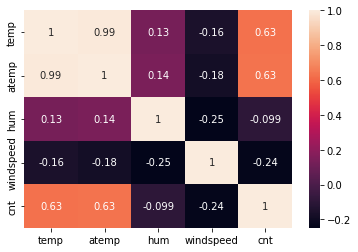

In [30]:
#Let us find the correlation matrix for the data
vars = numerical_vars + ['cnt']
sns.heatmap(bike_sharing[vars].corr(), annot = True)
plt.show()

In [31]:
# as observed temp and atemp are highly correlated.

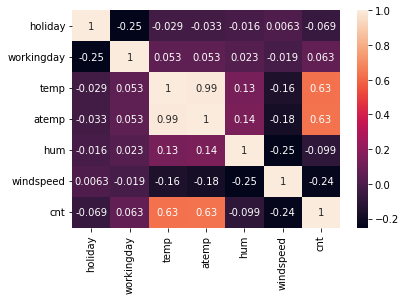

In [32]:
sns.heatmap(bike_sharing.corr(), annot = True)
plt.show()

In [33]:
#moving to categorical variables

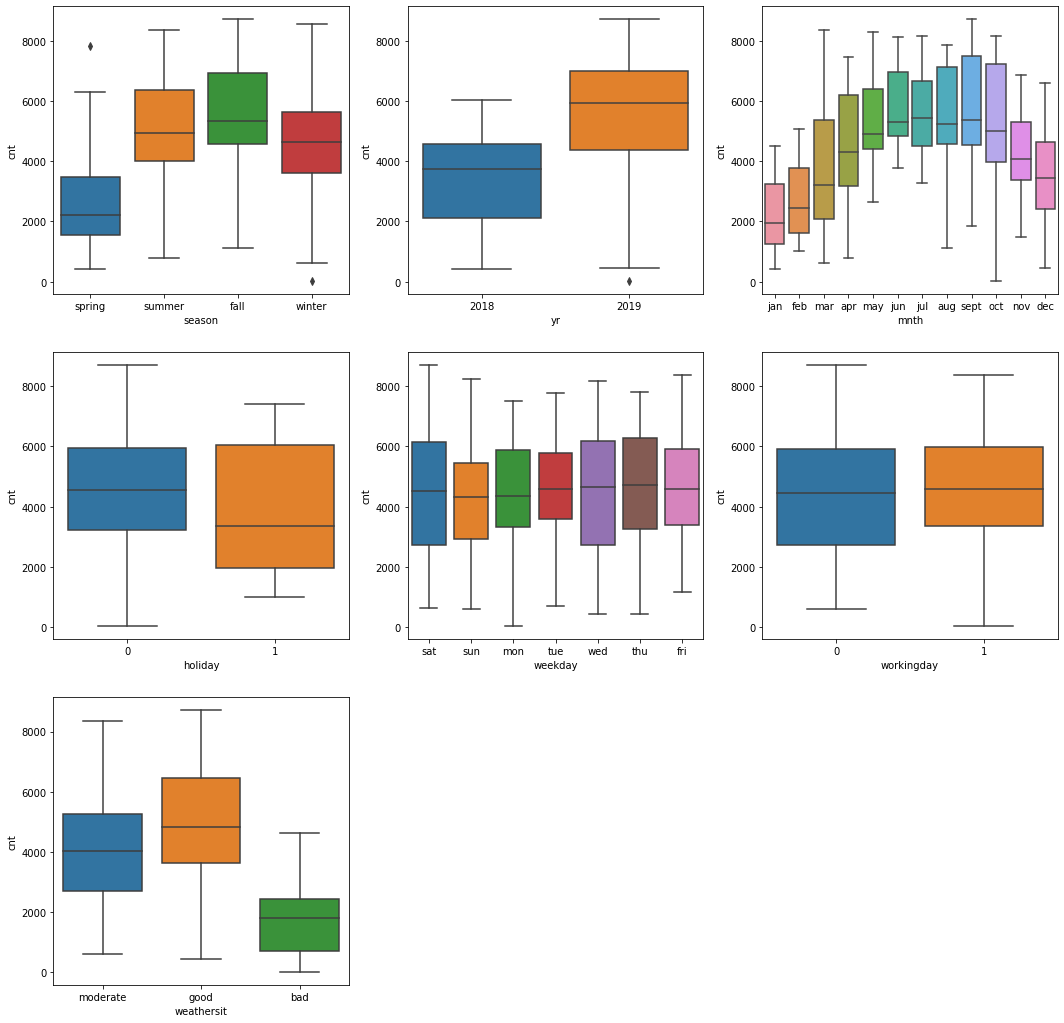

In [34]:
plt.figure(figsize=(18, 18))
for i in enumerate(categorical_vars):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bike_sharing, x=i[1], y='cnt')
plt.show()

In [35]:
# We get many insights here:
# Summer and fall have higher demand compared to other seasons
# Year 2019 received more demand
# June to September as the most active months
# Holiday is not that important here
# Day of the week also is not very significant
# Working day is also not very siginificant
# Weathersit, good and moderate get more demand rather than bad

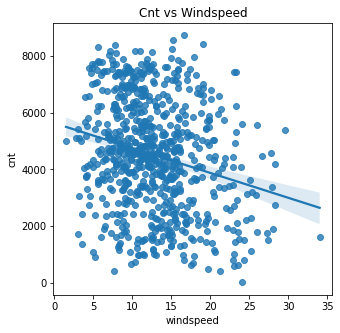

In [36]:
#Bi Variate for numerical 
plt.figure(figsize=(5,5))
plt.title("Cnt vs Windspeed")
sns.regplot(data=bike_sharing,y="cnt",x="windspeed")
plt.show()

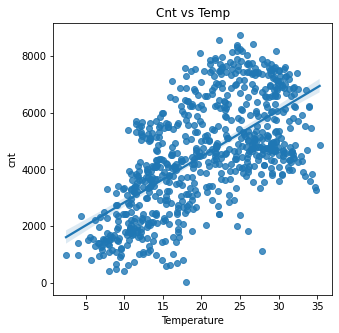

In [37]:
plt.figure(figsize=(5,5))
plt.title("Cnt vs Temp")
sns.regplot(data=bike_sharing,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

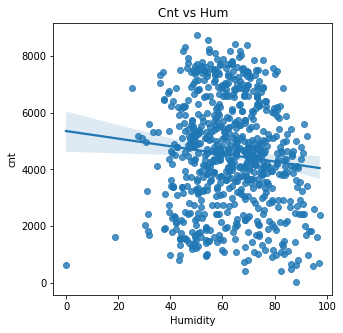

In [38]:
plt.figure(figsize=(5,5))
plt.title("Cnt vs Hum")
sns.regplot(data=bike_sharing,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.show()

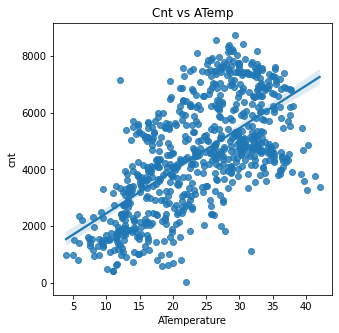

In [39]:
plt.figure(figsize=(5,5))
plt.title("Cnt vs ATemp")
sns.regplot(data=bike_sharing,y="cnt",x="atemp")
plt.xlabel("ATemperature")
plt.show()

In [40]:
# We can see count decreasing with increasing humidity, though slope is very gradual

In [41]:
# Data Preperation for the model

In [42]:
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


In [43]:
#Encoding
bike_sharing = pd.get_dummies(data=bike_sharing,columns=categorical_vars,drop_first=True)

In [44]:
bike_sharing

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_aug,...,holiday_1,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,workingday_1,weathersit_good,weathersit_moderate
0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
3,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
4,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,10.420847,11.33210,65.2917,23.458911,2114,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,1
726,10.386653,12.75230,59.0000,10.416557,3095,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
727,10.386653,12.12000,75.2917,8.333661,1341,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
728,10.489153,11.58500,48.3333,23.500518,1796,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [45]:
# Split into train and test

In [46]:
df_train,df_test = train_test_split(bike_sharing,train_size=0.7,random_state=100)

In [47]:
print(df_test.shape,df_train.shape)

(220, 30) (510, 30)


In [48]:
scaler =MinMaxScaler()

df_train[numerical_vars] = scaler.fit_transform(df_train[numerical_vars])
df_train.head()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_aug,...,holiday_1,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,workingday_1,weathersit_good,weathersit_moderate
576,0.815169,0.766351,0.725633,0.264686,7216,0,0,0,1,0,...,0,0,0,0,0,1,0,1,1,0
426,0.442393,0.438975,0.640189,0.255342,4066,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
728,0.245101,0.200348,0.498067,0.663106,1796,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
482,0.395666,0.391735,0.504508,0.188475,4220,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1
111,0.345824,0.318819,0.751824,0.380981,1683,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [49]:
y_train = df_train.pop('cnt')
X_train = df_train
y_test = df_test.pop('cnt')
X_test = df_test

In [50]:
print(X_train.shape)

(510, 29)


In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [52]:
#Building model using RFE
LinearRegressor = LinearRegression()
LinearRegressor.fit(X_train,y_train)

LinearRegression()

In [53]:
rfe = RFE(LinearRegressor,step = 15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), step=15)

In [54]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_aug', False, 2),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 2),
 ('mnth_jan', True, 1),
 ('mnth_jul', False, 2),
 ('mnth_jun', False, 2),
 ('mnth_mar', False, 2),
 ('mnth_may', False, 2),
 ('mnth_nov', False, 2),
 ('mnth_oct', False, 2),
 ('mnth_sept', True, 1),
 ('holiday_1', True, 1),
 ('weekday_mon', False, 2),
 ('weekday_sat', False, 2),
 ('weekday_sun', False, 2),
 ('weekday_thu', False, 2),
 ('weekday_tue', False, 2),
 ('weekday_wed', False, 2),
 ('workingday_1', False, 2),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [55]:
col = X_train.columns[rfe.support_]
col

Index(['temp', 'atemp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_dec', 'mnth_jan', 'mnth_sept',
       'holiday_1', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [56]:
X_train.columns[~rfe.support_]

Index(['mnth_aug', 'mnth_feb', 'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may',
       'mnth_nov', 'mnth_oct', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed', 'workingday_1'],
      dtype='object')

In [57]:
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm
def compute_vif(cols):
    vif = pd.DataFrame()
    vif['Features'] = X_train[cols].columns
    vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [58]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_dec,mnth_jan,mnth_sept,holiday_1,weathersit_good,weathersit_moderate
576,0.815169,0.766351,0.725633,0.264686,0,0,0,1,0,0,0,0,1,0
426,0.442393,0.438975,0.640189,0.255342,1,0,0,1,0,0,0,0,0,1
728,0.245101,0.200348,0.498067,0.663106,1,0,0,1,1,0,0,0,1,0
482,0.395666,0.391735,0.504508,0.188475,0,1,0,1,0,0,0,0,0,1
111,0.345824,0.318819,0.751824,0.380981,0,1,0,0,0,0,0,0,0,1


In [59]:
lm_rfe = build_model(X_train.columns[rfe.support_])


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     186.6
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          4.12e-187
Time:                        12:18:46   Log-Likelihood:                -4118.4
No. Observations:                 510   AIC:                             8267.
Df Residuals:                     495   BIC:                             8330.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 426.5568    

In [60]:
vif_rfe = compute_vif(X_train.columns[rfe.support_])

               Features     VIF
0                  temp  380.74
1                 atemp  365.85
2                   hum   26.06
12      weathersit_good   14.97
13  weathersit_moderate    9.07
4         season_spring    5.54
3             windspeed    4.90
6         season_winter    4.04
5         season_summer    2.97
7               yr_2019    2.09
9              mnth_jan    1.78
8              mnth_dec    1.38
10            mnth_sept    1.30
11            holiday_1    1.05


In [61]:
# p value is very high for atemp and Vif is also very high so we remove that
col_set_2 = list(X_train.columns[rfe.support_])
col_set_2.remove('atemp')
col_set_2


['temp',
 'hum',
 'windspeed',
 'season_spring',
 'season_summer',
 'season_winter',
 'yr_2019',
 'mnth_dec',
 'mnth_jan',
 'mnth_sept',
 'holiday_1',
 'weathersit_good',
 'weathersit_moderate']

In [62]:
build_model(col_set_2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.4
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          2.86e-188
Time:                        12:18:46   Log-Likelihood:                -4118.4
No. Observations:                 510   AIC:                             8265.
Df Residuals:                     496   BIC:                             8324.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 428.7320    

In [63]:
compute_vif(col_set_2)

               Features    VIF
1                   hum  26.05
0                  temp  22.77
11      weathersit_good  14.95
12  weathersit_moderate   9.05
3         season_spring   5.47
2             windspeed   4.64
5         season_winter   3.91
4         season_summer   2.87
6               yr_2019   2.09
8              mnth_jan   1.78
7              mnth_dec   1.38
9             mnth_sept   1.29
10            holiday_1   1.04


In [64]:
# since month december has high p value and the VIF is  low
col_set_3 = col_set_2
col_set_3.remove('mnth_dec')
col_set_3


['temp',
 'hum',
 'windspeed',
 'season_spring',
 'season_summer',
 'season_winter',
 'yr_2019',
 'mnth_jan',
 'mnth_sept',
 'holiday_1',
 'weathersit_good',
 'weathersit_moderate']

In [65]:
build_model(col_set_3)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.7
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          4.79e-189
Time:                        12:18:47   Log-Likelihood:                -4119.4
No. Observations:                 510   AIC:                             8265.
Df Residuals:                     497   BIC:                             8320.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 391.0034    

In [66]:
compute_vif(col_set_3)

               Features    VIF
1                   hum  25.26
0                  temp  21.44
10      weathersit_good  14.43
11  weathersit_moderate   8.89
3         season_spring   5.46
2             windspeed   4.63
5         season_winter   3.90
4         season_summer   2.83
6               yr_2019   2.09
7              mnth_jan   1.69
8             mnth_sept   1.28
9             holiday_1   1.04


In [67]:
#next we see that season spring has p value and relatively high vif so we can remove
col_set_4 = col_set_3
col_set_4.remove('season_spring')
col_set_4

['temp',
 'hum',
 'windspeed',
 'season_summer',
 'season_winter',
 'yr_2019',
 'mnth_jan',
 'mnth_sept',
 'holiday_1',
 'weathersit_good',
 'weathersit_moderate']

In [68]:
build_model(col_set_4)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     235.9
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          1.85e-189
Time:                        12:18:47   Log-Likelihood:                -4121.2
No. Observations:                 510   AIC:                             8266.
Df Residuals:                     498   BIC:                             8317.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  82.5817    

In [69]:
compute_vif(col_set_4)

               Features    VIF
1                   hum  19.29
0                  temp  11.14
9       weathersit_good  10.63
10  weathersit_moderate   7.70
2             windspeed   4.12
5               yr_2019   2.07
4         season_winter   1.96
3         season_summer   1.70
6              mnth_jan   1.65
7             mnth_sept   1.22
8             holiday_1   1.04


In [70]:
# We can see now that Vif of hum is very high, and p value is low, so now we will drop hum


In [71]:
col_set_5 = col_set_4
col_set_5.remove('hum')
col_set_5

['temp',
 'windspeed',
 'season_summer',
 'season_winter',
 'yr_2019',
 'mnth_jan',
 'mnth_sept',
 'holiday_1',
 'weathersit_good',
 'weathersit_moderate']

In [72]:
build_model(col_set_5)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.0
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          2.06e-186
Time:                        12:18:47   Log-Likelihood:                -4131.3
No. Observations:                 510   AIC:                             8285.
Df Residuals:                     499   BIC:                             8331.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1128.2468    

In [73]:
compute_vif(col_set_5)

              Features   VIF
8      weathersit_good  9.09
0                 temp  8.15
9  weathersit_moderate  5.29
1            windspeed  4.05
4              yr_2019  2.07
2        season_summer  1.67
3        season_winter  1.61
5             mnth_jan  1.52
6            mnth_sept  1.20
7            holiday_1  1.04


In [74]:
#Now we see that the weathersit_good is having a high vif so we shall drop that


In [75]:
col_set_6 = col_set_5
col_set_6.remove('weathersit_good')
col_set_6

['temp',
 'windspeed',
 'season_summer',
 'season_winter',
 'yr_2019',
 'mnth_jan',
 'mnth_sept',
 'holiday_1',
 'weathersit_moderate']

In [76]:
build_model(col_set_6)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     207.4
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          1.59e-162
Time:                        12:18:48   Log-Likelihood:                -4190.5
No. Observations:                 510   AIC:                             8401.
Df Residuals:                     500   BIC:                             8443.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1286.3010    

In [77]:
compute_vif(col_set_6)

              Features   VIF
0                 temp  3.77
1            windspeed  3.25
4              yr_2019  2.03
2        season_summer  1.62
8  weathersit_moderate  1.51
3        season_winter  1.40
5             mnth_jan  1.21
6            mnth_sept  1.20
7            holiday_1  1.04


In [78]:
# As the p value of mnth_jan seems to be too close to .05 we can try and drop it to see the change in r2_score
col_set_7 = col_set_6
col_set_7.remove('mnth_jan')
col_set_7

['temp',
 'windspeed',
 'season_summer',
 'season_winter',
 'yr_2019',
 'mnth_sept',
 'holiday_1',
 'weathersit_moderate']

In [79]:
build_model(col_set_7)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     231.5
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          7.07e-163
Time:                        12:18:48   Log-Likelihood:                -4192.5
No. Observations:                 510   AIC:                             8403.
Df Residuals:                     501   BIC:                             8441.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1085.4106    

In [80]:
compute_vif(col_set_7)

              Features   VIF
0                 temp  3.68
1            windspeed  2.99
4              yr_2019  1.99
2        season_summer  1.57
7  weathersit_moderate  1.46
3        season_winter  1.35
5            mnth_sept  1.20
6            holiday_1  1.03


In [81]:
# The coefficient of windspeed is very low and the VIF is very high, the temp and windspeed might be related let us try and drop that


In [82]:
col_set_8 = col_set_7
col_set_8.remove('windspeed')
col_set_8

['temp',
 'season_summer',
 'season_winter',
 'yr_2019',
 'mnth_sept',
 'holiday_1',
 'weathersit_moderate']

In [83]:
build_model(col_set_8)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     239.4
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          1.72e-155
Time:                        12:18:48   Log-Likelihood:                -4212.7
No. Observations:                 510   AIC:                             8441.
Df Residuals:                     502   BIC:                             8475.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 428.8449    

In [84]:
compute_vif(col_set_8)

              Features   VIF
0                 temp  2.83
3              yr_2019  1.94
1        season_summer  1.51
6  weathersit_moderate  1.42
2        season_winter  1.30
4            mnth_sept  1.19
5            holiday_1  1.03


In [85]:
# Our r2 score has dropped significantly, let us add some variables based on business insights and EDA


In [86]:
# we see that weathersit_good had a high coefficient so let us see what happens if we add that back

In [87]:
col_set_9 = col_set_8
col_set_9.append('weathersit_good')
col_set_9

['temp',
 'season_summer',
 'season_winter',
 'yr_2019',
 'mnth_sept',
 'holiday_1',
 'weathersit_moderate',
 'weathersit_good']

In [88]:
build_model(col_set_9)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     281.4
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          6.82e-180
Time:                        12:18:49   Log-Likelihood:                -4152.5
No. Observations:                 510   AIC:                             8323.
Df Residuals:                     501   BIC:                             8361.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2019.2442    

In [89]:
compute_vif(col_set_9)

              Features   VIF
0                 temp  6.66
7      weathersit_good  5.36
6  weathersit_moderate  3.16
3              yr_2019  2.05
1        season_summer  1.55
2        season_winter  1.44
4            mnth_sept  1.20
5            holiday_1  1.04


In [90]:
# From our Eda we had noticed that holiday may not be a good factor so let us drop that

In [91]:
col_set_10 = col_set_9
col_set_10.remove('holiday_1')
col_set_10

['temp',
 'season_summer',
 'season_winter',
 'yr_2019',
 'mnth_sept',
 'weathersit_moderate',
 'weathersit_good']

In [92]:
build_model(col_set_10)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     311.6
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          3.55e-178
Time:                        12:18:49   Log-Likelihood:                -4159.5
No. Observations:                 510   AIC:                             8335.
Df Residuals:                     502   BIC:                             8369.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2034.2751    

In [93]:
compute_vif(col_set_10)

              Features   VIF
0                 temp  6.63
6      weathersit_good  5.28
5  weathersit_moderate  3.14
3              yr_2019  2.05
1        season_summer  1.55
2        season_winter  1.44
4            mnth_sept  1.20


In [94]:
# weathersit_moderate and good are close to each other, maybe keeping one will make most sense

In [95]:
col_set_11 = col_set_10
col_set_11.remove('weathersit_moderate')
col_set_11

['temp',
 'season_summer',
 'season_winter',
 'yr_2019',
 'mnth_sept',
 'weathersit_good']

In [96]:
build_model(col_set_11)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     310.6
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          1.42e-165
Time:                        12:18:49   Log-Likelihood:                -4192.0
No. Observations:                 510   AIC:                             8398.
Df Residuals:                     503   BIC:                             8428.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -269.3027    128.749     

In [97]:
compute_vif(col_set_11)

          Features   VIF
0             temp  3.79
5  weathersit_good  2.40
3          yr_2019  1.95
1    season_summer  1.49
2    season_winter  1.28
4        mnth_sept  1.20


In [98]:
# we earlier dropped windspeed but we should try and add it back, as the absolute value of coefficient was high

In [99]:
col_set_12 = col_set_11
col_set_12.append('windspeed')
col_set_12

['temp',
 'season_summer',
 'season_winter',
 'yr_2019',
 'mnth_sept',
 'weathersit_good',
 'windspeed']

In [100]:
build_model(col_set_12)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     294.6
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          3.08e-173
Time:                        12:18:50   Log-Likelihood:                -4171.0
No. Observations:                 510   AIC:                             8358.
Df Residuals:                     502   BIC:                             8392.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             357.9095    156.388     

In [101]:
compute_vif(col_set_12)

          Features   VIF
0             temp  4.34
6        windspeed  3.07
5  weathersit_good  2.53
3          yr_2019  2.00
1    season_summer  1.55
2    season_winter  1.33
4        mnth_sept  1.20


In [102]:
col_set_13 = col_set_12
col_set_13.append('holiday_1')
col_set_13

['temp',
 'season_summer',
 'season_winter',
 'yr_2019',
 'mnth_sept',
 'weathersit_good',
 'windspeed',
 'holiday_1']

In [103]:
build_model(col_set_13)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     264.2
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          2.45e-174
Time:                        12:18:50   Log-Likelihood:                -4165.5
No. Observations:                 510   AIC:                             8349.
Df Residuals:                     501   BIC:                             8387.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             384.3100    155.062     

In [104]:
compute_vif(col_set_13)

          Features   VIF
0             temp  4.35
6        windspeed  3.08
5  weathersit_good  2.55
3          yr_2019  2.00
1    season_summer  1.55
2    season_winter  1.33
4        mnth_sept  1.20
7        holiday_1  1.04


In [105]:
# not much improvement due to holiday

In [106]:
# The col_set_12 seems to be the best until now

In [107]:
# let us now build the model using sklearn


In [108]:
lm_sklearn = LinearRegression()
lm_sklearn.fit(X_train[col_set_12],y_train)
print(lm_sklearn.intercept_,lm_sklearn.coef_)

384.3100170833741 [ 4717.83343694   784.96873112  1047.05510953  2056.65072595
   849.65426268   816.13742888 -1526.49796745  -806.60465458]


### Residual Analysis

In [109]:
y_train_pred = lm_sklearn.predict(X_train[col_set_12])

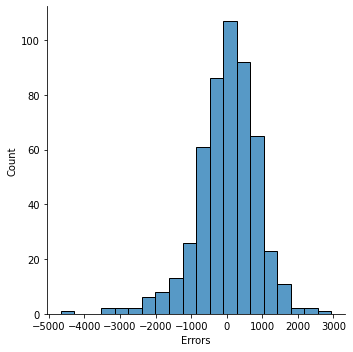

In [111]:
res = y_train - y_train_pred
sns.displot(res,bins=20)
plt.xlabel('Errors')
plt.show()

In [ ]:
#errors are normally distributed

In [ ]:
r2_score(y_train,y_train_pred)

0.8084073445944988

In [ ]:
X_test[numerical_vars] = scaler.transform(X_test[numerical_vars])

In [ ]:
y_test_pred = lm_sklearn.predict(X_test[col_set_12])

In [ ]:
r2_score(y_test,y_test_pred)

0.7832053902257508

### Homoscedacity

Text(0, 0.5, 'y_test_pred')

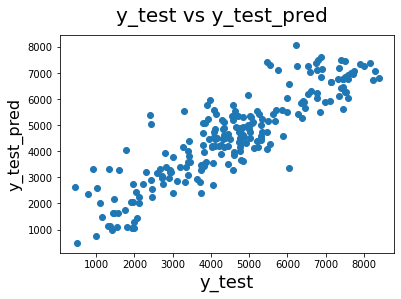

In [ ]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_test_pred', fontsize = 16)

### Independence of Errors

Text(0, 0.5, 'Residuals')

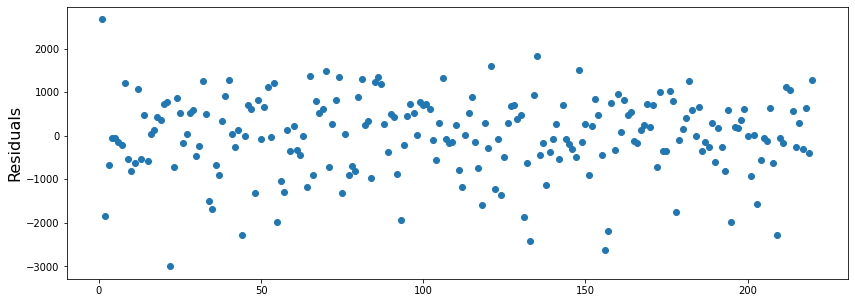

In [ ]:
c = [i for i in range(1,221,1)]
fig = plt.figure(figsize=(14,5))
plt.plot(c,y_test-y_test_pred, marker='o', linestyle="")
plt.ylabel('Residuals', fontsize=16)  

In [113]:
print(lm_sklearn.intercept_,lm_sklearn.coef_)

384.3100170833741 [ 4717.83343694   784.96873112  1047.05510953  2056.65072595
   849.65426268   816.13742888 -1526.49796745  -806.60465458]


### Assumptions of linear regression validity.
- Multicolinearity: Made sure that VIF is less than 5.
- Homoscedasticity: variance of residuals is within constant variance at every level.
- Error terms are normally distributed with test & train data.
- Linear dependency of target variable on few variables like temp.

Final Model


y = 357.9095 + 4756.4004 * temp + 795.5199 * season_summer + 1038.1702 * season_winter + 2058.7287 * yr_2019 + 822.5955 * mnth_sept + 800.5562 * weathersit_good - 1540.3134 * windspeed